In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# tensorflow version
print(tf.__version__)

2.13.0


#Fashion-mnist dataset consist of training set of 60,000 examples and a test set of 10,000 examples.
#Each  example is 28*28 gray scale image, associated with a label from 10 classes.
#The images show individual articles of clothing at low resolution(28*28 pixels)

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

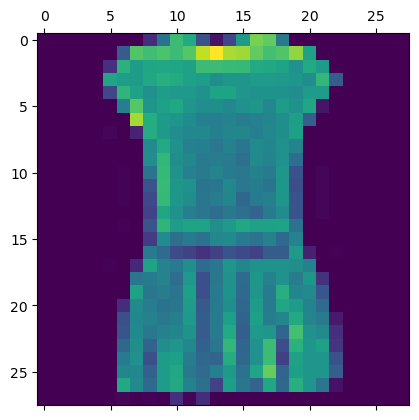

In [7]:
plt.matshow(x_train[3])

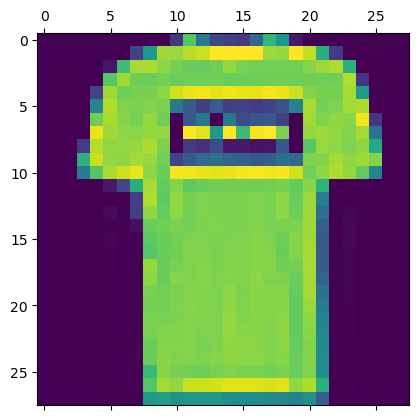

In [8]:
plt.matshow(x_train[1])

In [9]:
len(x_train)

60000

#Preprocess data

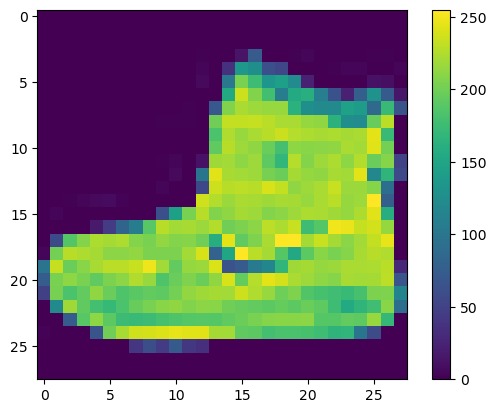

In [10]:
# Inspecting the first image
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

#Above pixel values fall in the range 0 to 255
#so scale values to a range of 0 to 1 before feeding nn.
#to do so divide values by 255.
#It's important to that training and testing set be preprocessed in the same way

In [11]:
#Each label is an integer between 0 and 9
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
x_train=x_train/255.0
x_test=x_test/255.0

In [13]:
model=keras.Sequential(
[
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(128,activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [14]:
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=["accuracy"]  

)

In [15]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4895 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3593 - accuracy: 0.8688
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3180 - accuracy: 0.8823
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2959 - accuracy: 0.8899
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2753 - accuracy: 0.8973
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2617 - accuracy: 0.9014
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2468 - accuracy: 0.9066
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2356 - accuracy: 0.9109
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2258 - accuracy: 0.9144
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.215

In [16]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3303 - accuracy: 0.8811


[0.33027422428131104, 0.8810999989509583]

In [17]:
y_predicted=model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [18]:
y_test[7]

6

In [19]:
y_predicted[7]

array([1.04905274e-02, 2.20354877e-06, 2.48086199e-01, 1.31266313e-02,
       9.41909790e-01, 1.13143076e-04, 9.98704791e-01, 1.56042529e-02,
       5.87455346e-04, 1.03755656e-03], dtype=float32)

In [20]:
y_predicted_label=[np.argmax(i) for i in y_predicted]

In [21]:
y_predicted_label[7]

6

In [22]:
# confusion matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)

Text(58.222222222222214, 0.5, 'Truth')

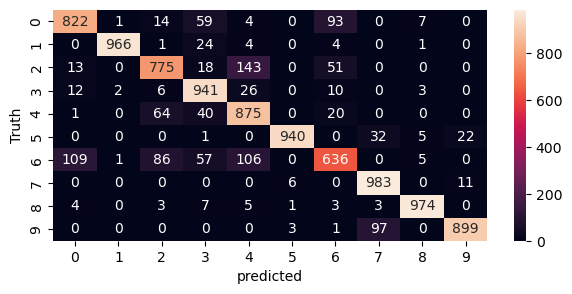

In [23]:
import seaborn as sns
plt.figure(figsize=(7,3))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')